## Шаг 1: изучим предлагаемые датасеты

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from math import factorial
import matplotlib.pyplot as plt

### <font color = 'green'> </b> Датасет с информацией о звонках </b> </font>

In [2]:
calls = pd.read_csv ('/datasets/calls.csv')

In [3]:
calls.duplicated().sum()

0

In [4]:
display(calls.head(10))
calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
calls.query('id == 0')['id'].count()
calls.query('call_date == 0')['call_date'].count()
calls.query('duration == 0')['duration'].count()
calls.query('user_id == 0')['user_id'].count()

0

#### Описание данных в calls (информация о звонках):  
- id — уникальный номер звонка  
- call_date — дата звонка  
- duration — длительность звонка в минутах  
- user_id — идентификатор пользователя, сделавшего звонок  

#### Замеченые проблемы в данных  
Хотя в таблице и отсутствуют пропущенные значения, но все равно имеются проблемы в данных а именно:  
- call_date - необходимо привести к типу datetime для удобной работы с датами.  
- duration - 39613 нулевой длительности звонков требует обработки, так же приведем тип float64 к int64 c округлением данных до минуты.

### <font color = 'green'> </b> Датасет с информацией об интернет-сессиях </b> </font>

In [6]:
internet = pd.read_csv ('/datasets/internet.csv')

In [7]:
display(internet.head(10))
internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [8]:
internet.query('id == 0')['id'].count()
internet.query('session_date == 0')['session_date'].count()
internet.query('user_id == 0')['user_id'].count()
internet.query('mb_used == 0')['mb_used'].count()

19598

In [9]:
del internet['Unnamed: 0']

#### Описание данных в internet (информация об интернет-сессиях):  
- id — уникальный номер сессии  
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)  
- session_date — дата интернет-сессии  
- user_id — идентификатор пользователя  


#### Замеченые проблемы в данных  
Хотя в таблице и отсутствуют пропущенные значения, но все равно имеются проблемы в данных а именно:  
- session_date - необходимо привести к типу datetime для удобной работы с датами.  
- mb_used - приведем тип float64 к int64 с округлением данных до мегабайта, нулевые значения трафика свидетельствуют о том, что клиент не пользуется интернетом.

### <font color = 'green'> </b> Датасет с информацией о сообщениях </b> </font>

In [10]:
messages = pd.read_csv ('/datasets/messages.csv')

In [11]:
display(messages.head(10))
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [12]:
messages.query('id == 0')['id'].count()
messages.query('message_date == 0')['message_date'].count()
messages.query('user_id == 0')['user_id'].count()

0

#### Описание данных в messages (информация о сообщениях):  
- id — уникальный номер сообщения  
- message_date — дата сообщения  
- user_id — идентификатор пользователя, отправившего сообщение  

#### Замеченые проблемы в данных  
- message_date - необходимо привести к типу datetime для удобной работы с датами.

### <font color = 'green'> </b> Датасет с информацией о тарифах </b> </font>

In [13]:
tariffs = pd.read_csv ('/datasets/tariffs.csv')

In [14]:
display(tariffs.head(10))
tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


#### Описание данных в tariffs (информация о тарифах):  
- ariff_name — название тарифа  
- rub_monthly_fee — ежемесячная абонентская плата в рублях  
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату  
- messages_included — количество сообщений в месяц, включённых в абонентскую плату  
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)  
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)  
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета  
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)  

### <font color = 'green'> </b> Датасет с информацией о пользователях </b> </font>

In [15]:
users = pd.read_csv ('/datasets/users.csv')

In [16]:
display(users.tail(10))
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
490,1490,30,NaN,Москва,Радомир,Алесин,2018-04-03,smart
491,1491,56,NaN,Челябинск,Радислав,Андрейкин,2018-04-25,ultra
492,1492,63,NaN,Санкт-Петербург,Руслана,Артёменко,2018-06-26,smart
493,1493,71,NaN,Красноярск,Таисия,Ахматулина,2018-11-24,ultra
494,1494,62,NaN,Омск,Ренат,Андропов,2018-08-17,smart
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


#### Описание данных в users (информация о пользователях):  
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом 
- city — город проживания пользователя
- tariff — название тарифного плана

In [17]:
users.query('user_id == 0')['user_id'].count()

0

In [18]:
users['age'].value_counts()

53    14
42    14
63    13
71    13
64    13
73    12
21    12
40    12
39    11
47    11
29    11
26    11
37    11
41    10
36    10
58    10
45    10
70    10
52    10
51     9
27     9
48     9
50     9
28     9
30     9
24     9
20     9
19     9
56     9
23     9
68     9
66     9
65     9
69     8
62     8
60     8
44     8
55     8
25     7
43     7
67     7
35     7
74     7
32     7
31     7
46     7
75     6
54     6
59     6
18     6
33     5
34     5
38     5
22     5
72     5
49     4
57     4
61     3
Name: age, dtype: int64

In [19]:
users['churn_date'].isnull().sum()

462

In [20]:
users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [21]:
users['first_name'].unique()

array(['Рафаил', 'Иван', 'Евгений', 'Белла', 'Татьяна', 'Афанасий',
       'Леонид', 'Юна', 'Рустэм', 'Василиса', 'Эдуард', 'Веселина',
       'Варлам', 'Борис', 'Яков', 'Рузана', 'Марица', 'Мария', 'Матвей',
       'Игнатий', 'Тала', 'Святослав', 'Людмила', 'Иулиан', 'Владислав',
       'Рустем', 'Алексей', 'Мариетта', 'Лаврентий', 'Инна', 'Лия',
       'Розалия', 'Анжелика', 'Изольда', 'Агнесса', 'Юрий', 'Михаил',
       'Константин', 'Марианна', 'Иннокентий', 'Джемма', 'Екатерина',
       'Милица', 'Лола', 'Габриель', 'Кристина', 'Павел', 'Ренальд',
       'Луиза', 'Радислав', 'Динара', 'Лукий', 'Глеб', 'Тамара',
       'Александр', 'Таира', 'Роза', 'Исак', 'Юзефа', 'Ким', 'Гордей',
       'Эльза', 'Гектор', 'Андрей', 'Рафаэль', 'Фёдор', 'Харитон',
       'Еремей', 'Всеволод', 'Софья', 'Авксентий', 'Виолетта', 'Ириней',
       'Гелена', 'Ксения', 'Вера', 'Вениамин', 'Вероника', 'Даниэла',
       'Алла', 'Элеонора', 'Аюна', 'Руслан', 'Онисим', 'Марта', 'Эльвира',
       'Габриэль', '

In [22]:
users['last_name'].unique()

array(['Верещагин', 'Ежов', 'Абрамович', 'Белякова', 'Авдеенко', 'Горлов',
       'Ермолаев', 'Березина', 'Пономарёв', 'Блинова', 'Кононов',
       'Алёшко', 'Соловьев', 'Андреенко', 'Акинфьев', 'Алюшина',
       'Сазонова', 'Аленникова', 'Золотов', 'Круглов', 'Костина',
       'Тихонов', 'Трофимова', 'Мельникова', 'Антипов', 'Акинин',
       'Бородин', 'Авдеев', 'Евсеев', 'Селезнев', 'Русанова', 'Тимофеев',
       'Игнатьева', 'Бабушкина', 'Бондарев', 'Аракина', 'Андропова',
       'Архипова', 'Денисова', 'Одинцов', 'Кравцов', 'Добрынин',
       'Родионова', 'Рябов', 'Карасева', 'Александрова', 'Меркулова',
       'Мясникова', 'Ларин', 'Аничкина', 'Сомова', 'Панов', 'Фёдоров',
       'Платонова', 'Артемьев', 'Дьячкова', 'Глушков', 'Свиридов',
       'Рудаков', 'Ситникова', 'Коршунов', 'Климова', 'Алфеева',
       'Игнатова', 'Малахов', 'Абашкина', 'Демьянов', 'Кочетов',
       'Селиванова', 'Чумаков', 'Андрейкин', 'Павловский', 'Никулин',
       'Шарапов', 'Кольцова', 'Литвинов', 'Авр

In [23]:
users.query('reg_date == 0')['reg_date'].count()

0

In [24]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

#### Замеченые проблемы в данных  
- reg_date — приведем столбец к datetime
- churn_date — пропущенные данные означают, что пользователь продолжает пользоваться тарифом, приведем столбец к datetime

## Шаг 2: предобработка данных

### исправляем найденные проблемы в датасете calls

In [25]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

> "Обратите внимание: компания всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута."
##### Поэтому факт состоявшейся беседы зафиксирован в таблице нулями, а значит нулевые значения стобца duration оператор округлит до целой минуты, значит и мы приведем к 1 минуте, так же изменим тип данных на int

In [26]:
calls['duration'].replace(0, 1, inplace = True)

In [27]:
calls['duration'] = calls['duration'].apply(np.ceil).astype('int64')

### исправляем найденные проблемы в датасете internet

In [28]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [29]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype('int64')

### исправляем найденные проблемы в датасете messages

In [30]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

### исправляем найденные проблемы в датасете users

In [31]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [32]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

### Анализируем количество сделанных звонков и израсходованных минут разговора по месяцам (мин)

#### Так как все данные относятся к 2018 г. извлечем из столбца call_date месяца, после чего сгруппируем получившиеся данные и посчитаем количество звонков и потраченых минут по месяцам

In [33]:
 import datetime as dt

In [34]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,1,1000
1,1000_1,2018-08-17,1,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [35]:
calls['call_date'] = calls['call_date'].dt.month

In [36]:
calls.set_axis(['id', 'month', 'duration', 'user_id'], axis=1, inplace = True)

In [37]:
calls_group = calls.groupby(['user_id', "month"])['duration'].sum()

In [38]:
calls_group.reset_index(level = 'month')  

,month,duration
user_id,,
1000,5,164
1000,6,187
1000,7,346
1000,8,418
1000,9,478
...,...,...
1498,10,258
1499,9,71
1499,10,473


### Анализируем количество отправленных сообщений по месяцам (шт)

In [39]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [40]:
messages['message_date'] = messages['message_date'].dt.month

In [41]:
messages.set_axis(['id', 'month', 'user_id'], axis=1, inplace = True)

In [42]:
messages_group = messages.groupby(['user_id',"month"])['id'].count()

In [43]:
messages_group.reset_index(level = 'month')  

,month,id
user_id,,
1000,5,22
1000,6,60
1000,7,75
1000,8,81
1000,9,57
...,...,...
1498,10,42
1499,9,11
1499,10,48


### Анализируем объем израсходованного интернет-трафика по месяцам (mb)

In [44]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000


In [45]:
internet['session_date'] = internet['session_date'].dt.month

In [46]:
internet.set_axis(['id', 'mb_used', 'month', 'user_id'], axis=1, inplace = True)

In [47]:
internet_group = internet.groupby(['user_id', "month"])['mb_used'].sum()

In [48]:
internet_group.reset_index(level = 'month')  

,month,mb_used
user_id,,
1000,5,2256
1000,6,23257
1000,7,14016
1000,8,14070
1000,9,14581
...,...,...
1498,10,20604
1499,9,1848
1499,10,17809


### Определим помесячную выручку с каждого пользователя 


#### Объединим наши таблицы в один датафрейм


In [49]:
data = pd.concat([calls_group, messages_group, internet_group], axis=1).reset_index().fillna(0).astype('int64')

In [50]:
data_all = users.merge(data, on='user_id')

In [51]:
data_all.set_axis(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff', 'month', 'time_calls', 'messages', 'mb_used'], axis=1, inplace = True)

In [52]:
data_all

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,time_calls,messages,mb_used
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,164,22,2256
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,187,60,23257
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,346,75,14016
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,418,81,14070
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,478,57,14581
...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,258,42,20604
3210,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,71,11,1848
3211,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,10,473,48,17809
3212,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,11,624,59,17984


#### Зададим функцию для подсчета помесячной выручки с каждого пользователя с учетом тарифного плана

In [53]:
def money_charger (row):
    tariff = row['tariff']
    mins = row['time_calls'] 
    meg = row['mb_used'] 
    mes = row['messages'] 
    for row in data_all:
        if tariff == 'ultra':
            minutes =  mins - tariffs.loc[1, 'minutes_included']
            mb = meg - tariffs.loc[1, 'mb_per_month_included']
            mess = mes - tariffs.loc[1, 'messages_included']
            if minutes <= 0:
                minutes = 0
            else:
                minutes = minutes * tariffs.loc[1, 'rub_per_minute']
            if mb <= 0:
                mb = 0
            else:
                mb = mb * (tariffs.loc[1, 'rub_per_gb'] / 1000)
            if mess <= 0:
                mess = 0
            else:
                mess = mess * tariffs.loc[1, 'rub_per_message']
            money = minutes + mb + mess + tariffs.loc[1, 'rub_monthly_fee']
            return (money)
        if tariff == 'smart':
            minutes = mins - tariffs.loc[0, 'minutes_included']
            mb = meg - tariffs.loc[0, 'mb_per_month_included']
            mess = mes - tariffs.loc[0, 'messages_included']
            if minutes <= 0:
                minutes = 0
            else:
                minutes = minutes * tariffs.loc[0, 'rub_per_minute']
            if mb <= 0:
                mb = 0
            else:
                mb = mb * (tariffs.loc[0, 'rub_per_gb'] / 1000)
            if mess <= 0:
                mess = 0
            else:
                mess = mess * tariffs.loc[0, 'rub_per_message']
            money = minutes + mb + mess + tariffs.loc[0, 'rub_monthly_fee']
            return (money)
data_all['money_month'] = data_all.apply(money_charger, axis=1)         

## Шаг 3. Анализируем поведение клиентов из выборки

In [54]:
d_a_g = data_all.groupby(['tariff', 'month'])['time_calls','messages','mb_used', 'money_month']

In [55]:
mean_data = d_a_g.mean()

In [56]:
mean_data.reset_index(level='month')

,month,time_calls,messages,mb_used,money_month
tariff,,,,,
smart,1,209.647059,18.235294,8524.441176,708.088235
smart,2,306.310345,24.086207,11611.396552,816.689655
smart,3,400.532468,31.857143,15123.857143,1143.127273
smart,4,377.000000,30.741071,13479.482143,940.862500
smart,5,398.404255,33.773050,15825.198582,1171.967376
smart,6,406.701220,33.402439,15814.768293,1175.474390
smart,7,419.288557,33.751244,15763.512438,1196.552239
smart,8,433.191489,33.638298,16632.174468,1289.139574
smart,9,440.080769,33.638462,16324.526923,1228.774615


In [57]:
mdsmart = mean_data.query('tariff == "smart"')
print("Среднее smart")
display(mdsmart.mean())
print("Дисперсия smart")
display(np.var(mdsmart, ddof=1))
print("Стандартное отклонение smart")
display(np.std(mdsmart, ddof=1))

Среднее smart


time_calls       397.374228
messages          31.413211
mb_used        15077.690651
money_month     1155.858860
dtype: float64

Дисперсия smart


time_calls     5.516161e+03
messages       2.604483e+01
mb_used        7.154222e+06
money_month    5.436127e+04
dtype: float64

Стандартное отклонение smart


time_calls       74.270865
messages          5.103413
mb_used        2674.737763
money_month     233.155028
dtype: float64

In [58]:
mdultra = mean_data.query('tariff == "ultra"')
print("Среднее ultra")
display(mdultra.mean())
print("Дисперсия ultra")
display(np.var(mdultra, ddof=1))
print("Стандартное отклонение ultra")
display(np.std(mdultra, ddof=1))

Среднее ultra


time_calls       509.356551
messages          43.714983
mb_used        18222.784561
money_month     2041.051326
dtype: float64

Дисперсия ultra


time_calls     6.329465e+03
messages       1.517940e+02
mb_used        8.931621e+06
money_month    3.037745e+03
dtype: float64

Стандартное отклонение ultra


time_calls       79.557936
messages         12.320470
mb_used        2988.581755
money_month      55.115746
dtype: float64

#### Видно, что в среднем разница между потребностями клиентов тарифа smart и ultra не очень сильно различается. Клиенты smart тарифа практически полностью используют предложеный пакет, в то время как обладатели ultra его сильно недорасходуют. Так же, опираясь на среднее значение выборки можно сделать вывод, что обладатели старшего тарифа приносят компании на 56.6% больше выручки, чем обладатели младшего тарифа.

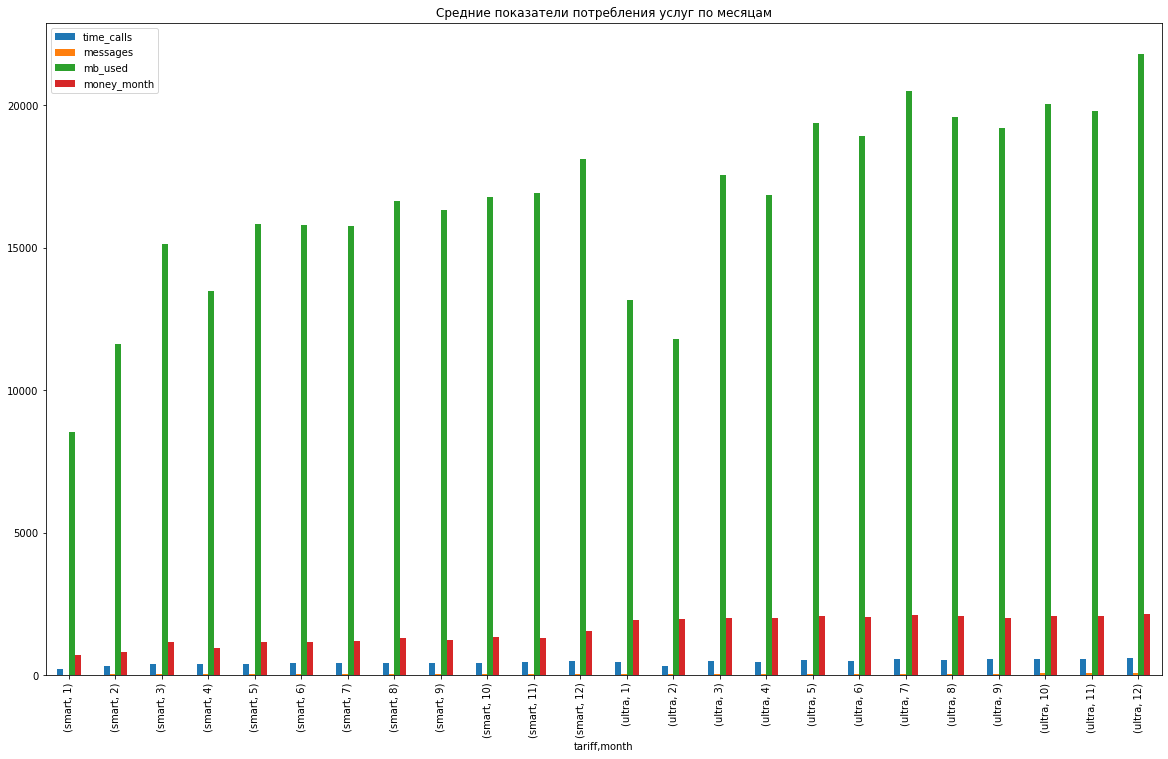

In [59]:
mean_data.plot(kind='bar', figsize=(20, 12), title='Средние показатели потребления услуг по месяцам')

#### Датасет скошен влево, как для пользователей smart тарифа, так и для ultra. При этом потребление услуг смс и звонков в течение всего года у пользователей обоих тарифов распределено равномерно, в то время как услуги интернета в обоих случаях набирают оборот и достигают пикового значения в конце года.   
#### Из этого можно сделать вывод, что главным критерием выбора пользователей тарифного плана является доступный трафик интернета.

In [60]:
var_data = d_a_g.var(ddof=1)

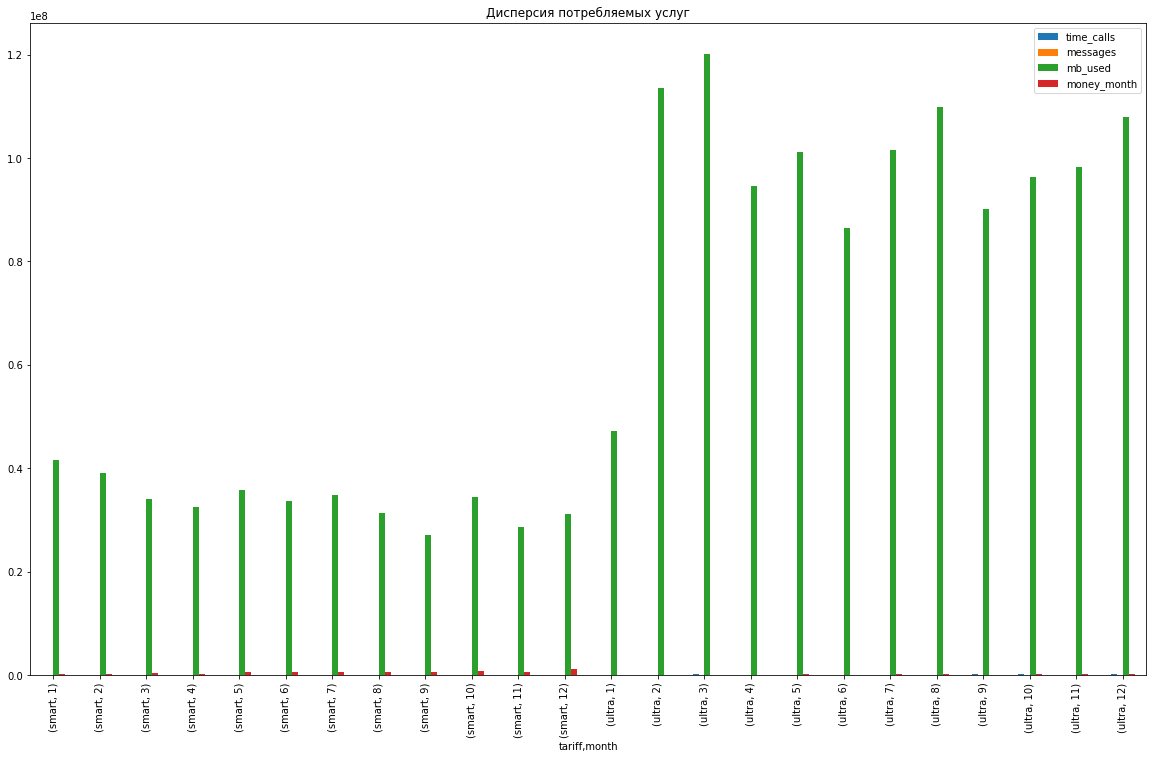

In [61]:
var_data.plot(kind='bar', figsize=(20, 12), title='Дисперсия потребляемых услуг')

In [62]:
std_data = d_a_g.std(ddof=1)

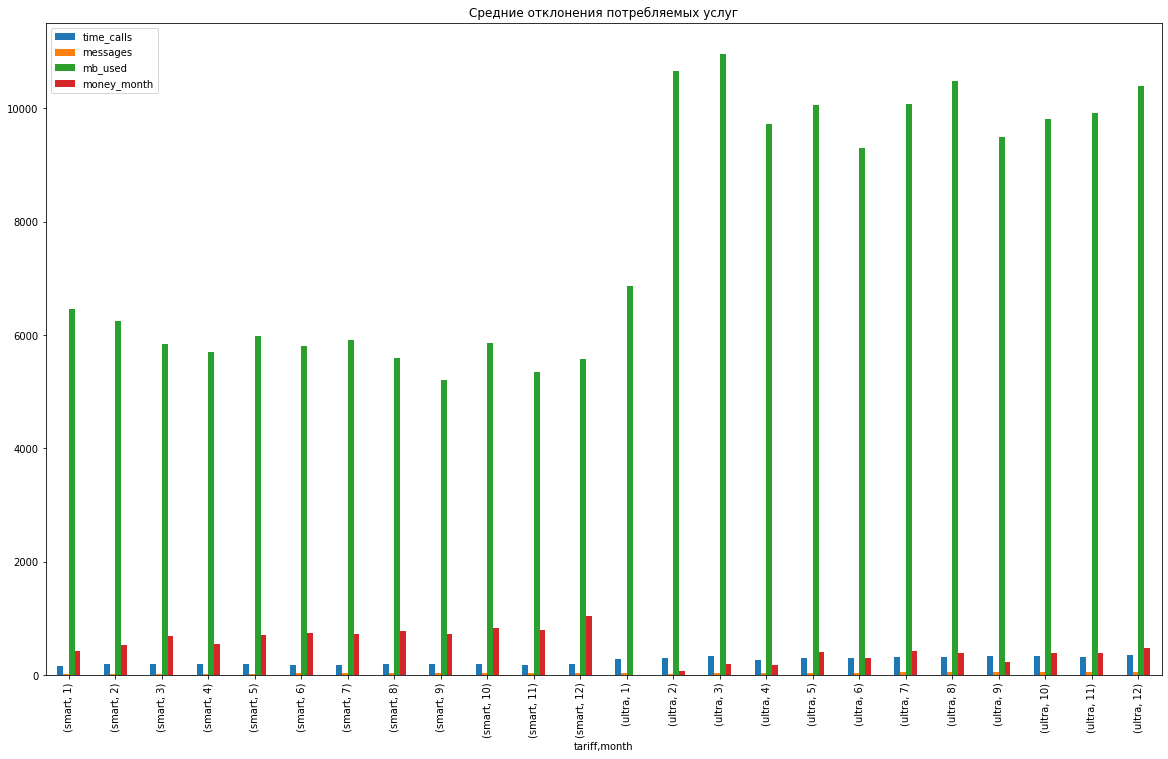

In [63]:
std_data.plot(kind='bar', figsize=(20, 12), title='Средние отклонения потребляемых услуг')

## Шаг 4. Проверяем гипотезы

### Проверяем гипотезу о равенстве средней выручки между тарифами

In [64]:
alpha = 0.05

In [65]:
ultracombo = data_all.query("tariff == 'ultra'")
smartcombo = data_all.query("tariff == 'smart'")

In [66]:
results = st.ttest_ind(ultracombo['money_month'], smartcombo['money_month'])
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.2125247441828657e-170
Отвергаем нулевую гипотезу


In [67]:
display(ultracombo['money_month'].mean())
smartcombo['money_month'].mean()

2063.1826903553297

1263.3124270973533

#### Отвергаем гипотезу о равнодоходности тарифов. Так как тест не показывает в какую сторону отличается выручка, а только лишь опровергает нашу гипотезу о равенсте, прибегнем к подсчету среднего значения по столбцу, для того чтобы определить какой тариф приносит больше денег компании. Как уже говорилось ранее - средняя выручка тарифа ultra выше средней выручки тарифа smart.

### Проверяем гипотезу о равенстве средней выручки от пользователей из Москвы с остальными регионами

In [68]:
moscow = data_all.query("city == 'Москва'")
other = data_all.query("city != 'Москва'")

In [69]:
alpha = 0.05
results = st.ttest_ind(moscow['money_month'], other['money_month'])
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5530488301318164
Не получилось отвергнуть нулевую гипотезу


In [70]:
display(moscow['money_month'].mean())
other['money_month'].mean()

1525.6638297872341

1504.4094314252786

#### Теорию о том, что в среднем клиенты из Москвы приносят больше денег, чем клиенты из других регионов отвергнуть не получилось. И действительно, если взглянуть на среднее этих двух показателей, то они примерно равны. Из чего делаеем вывод, что регион неимеет столь большой значимости в генерации капитала компании.

## Шаг 5. Общий вывод

#### В данном проекте мы исследовали два тарифных плана компании с целью определить какой тариф является приоритетным для рекламирования.  
#### В ходе работы мы проанализировали предоставленные данные, выделили объемы услуг, потребляемые пользователями помесячно, а так же прибыльность каждого клиента.  
#### Проведя статистический анализ, на основе выдвинутых гипотез, мы определили что тариф ультра имеет большую доходность, нежели младший тарифный план. В то же время регионы покрытия по доходности мало отличаются друг от друга, что позволяет утверждать, что усиливать рекламу в каком-то конкретном регионе (или же наоборот снижать ее бюджет) не имеет смысла.
#### При более детальном анализе тарифов заметно, что для клиентов важнейшим параметром тарифа является предоставляемый трафик интернета, так как в среднем потребность в смс и звонках у пользователей стабильная и между тарифами различается не сильно.